In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
N

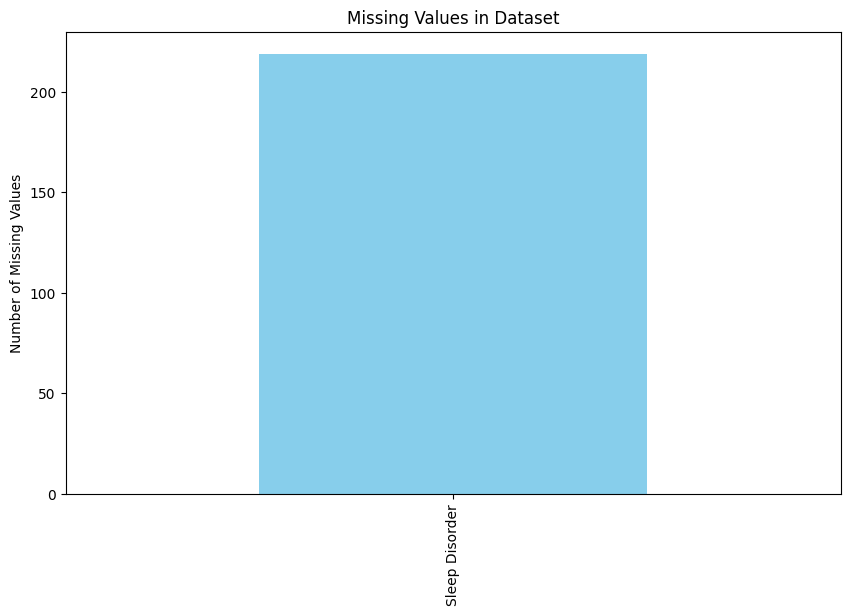

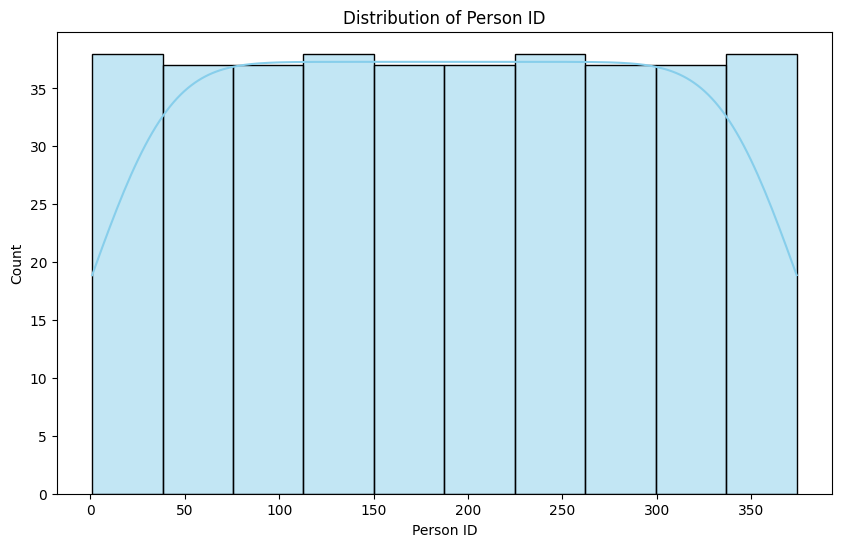

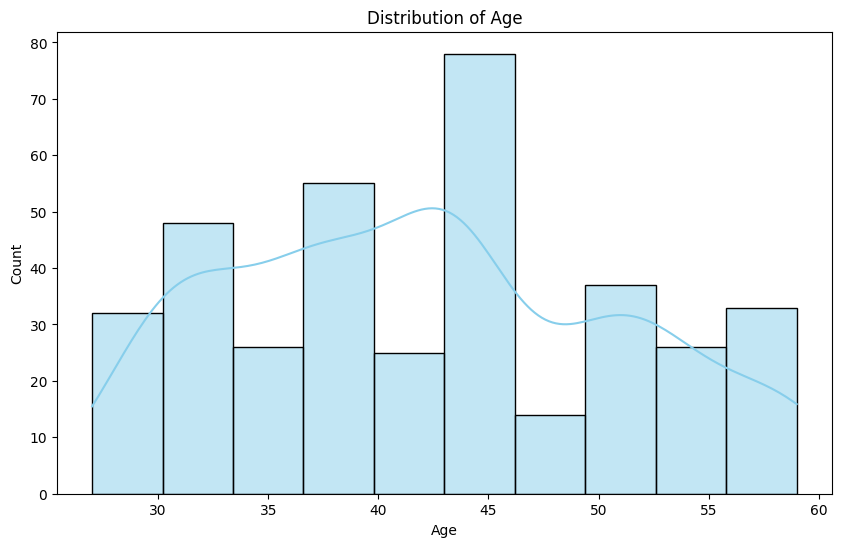

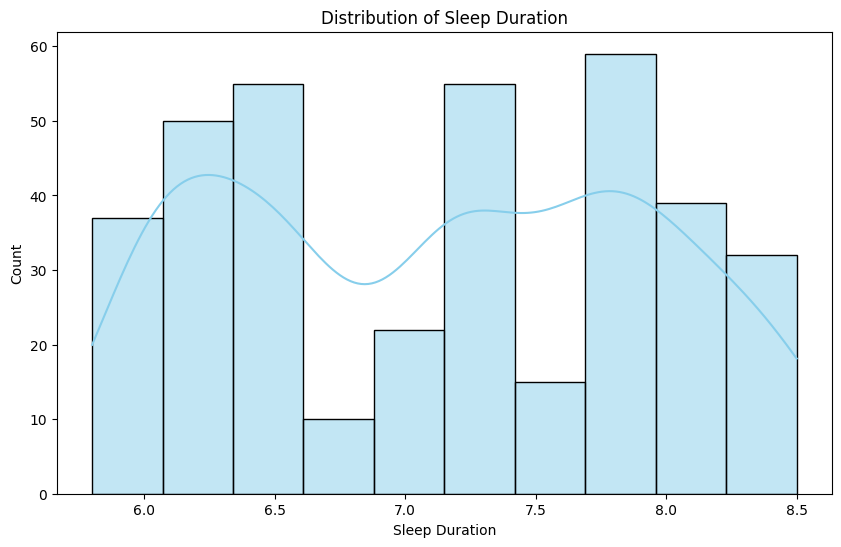

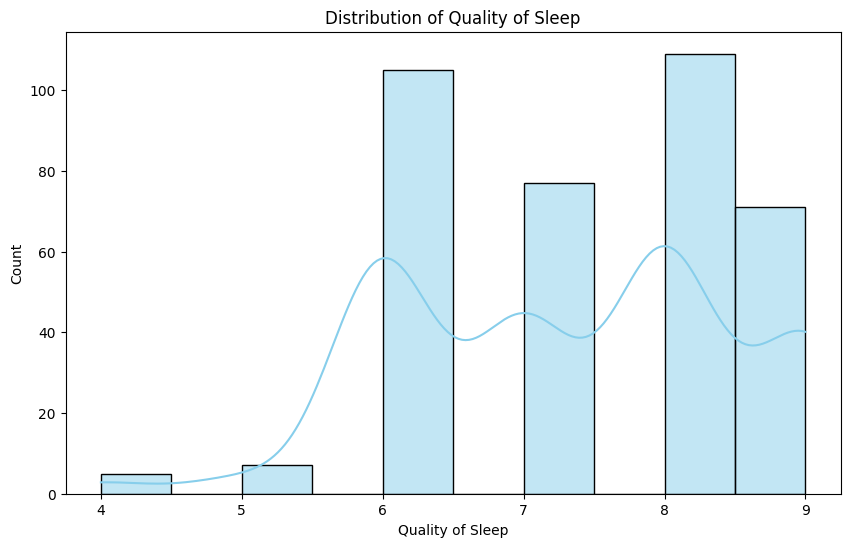

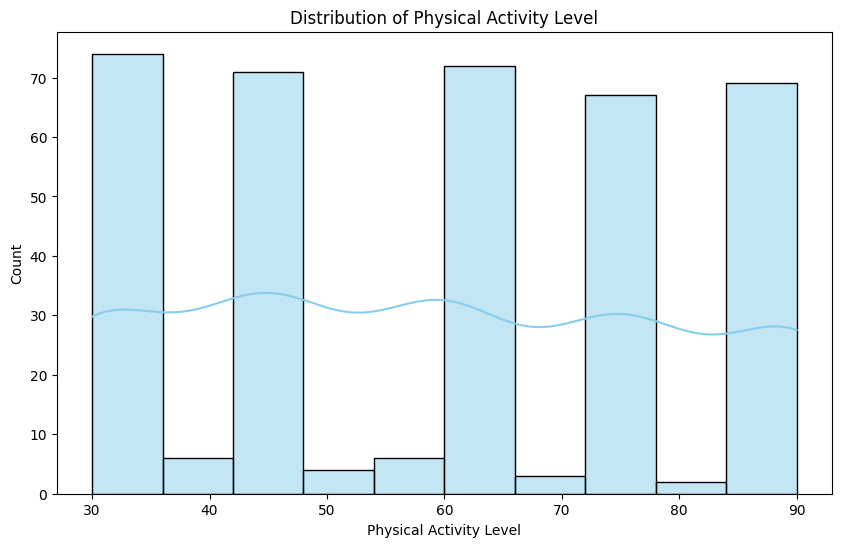

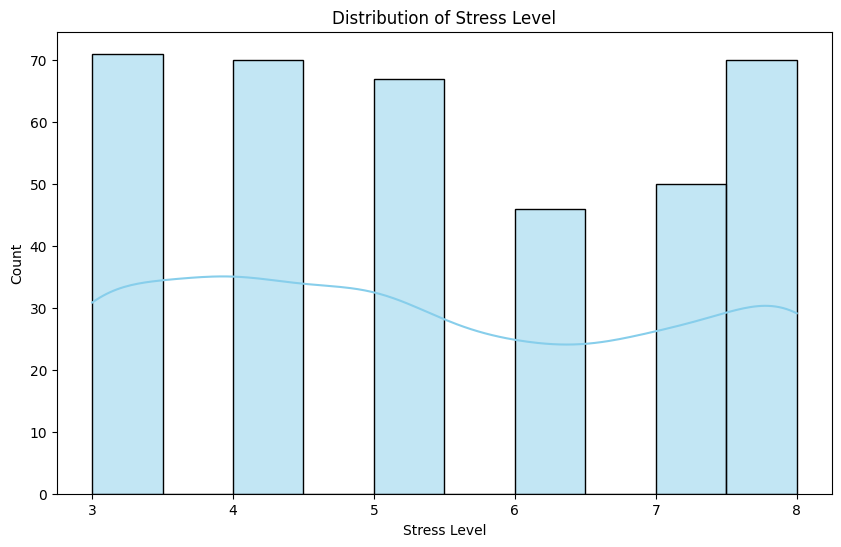

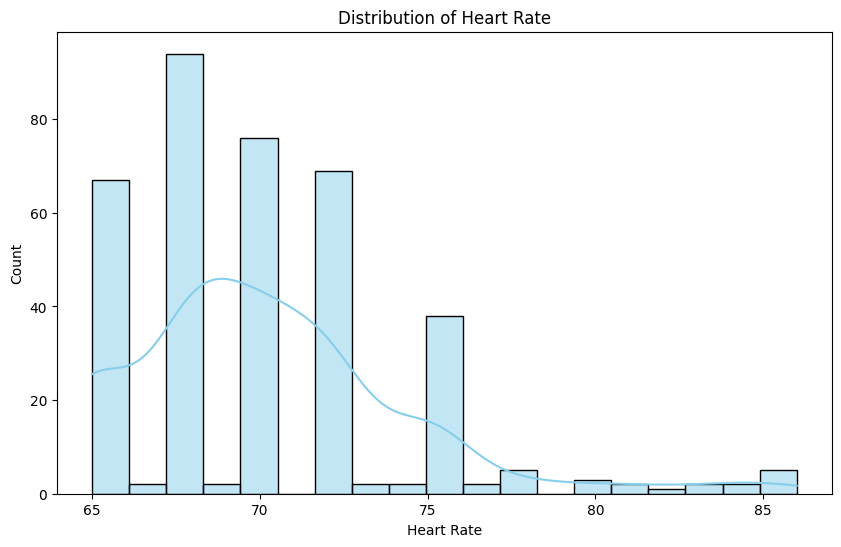

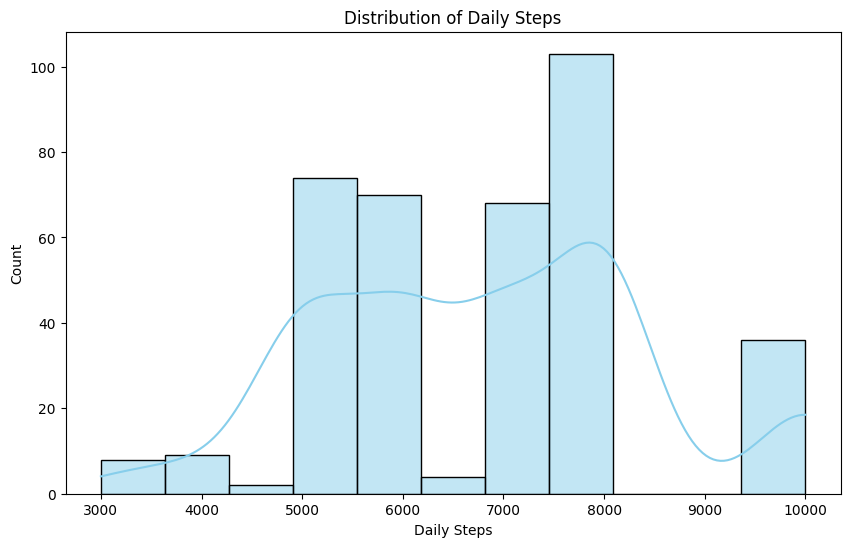

C:\Users\HP\AppData\Local\Temp\ipykernel_39468\3934255490.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=stress, palette='Set2')


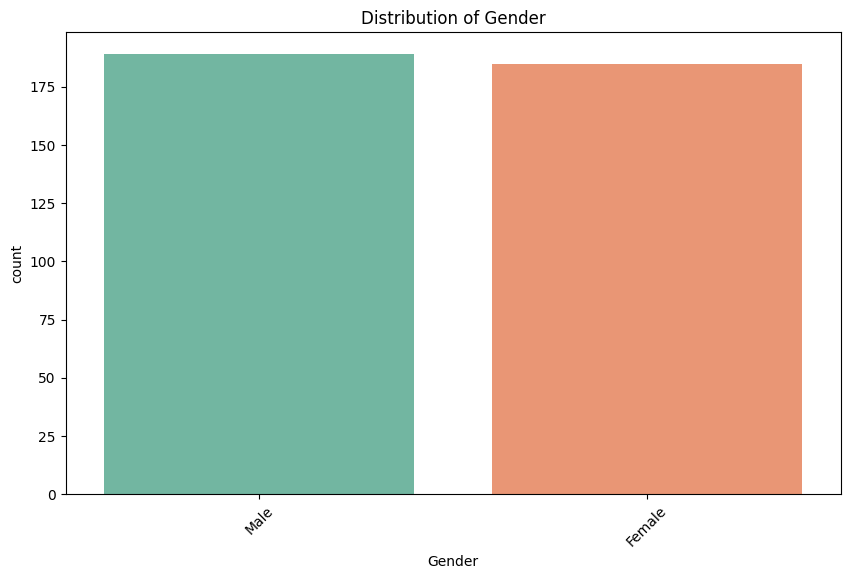

C:\Users\HP\AppData\Local\Temp\ipykernel_39468\3934255490.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=stress, palette='Set2')


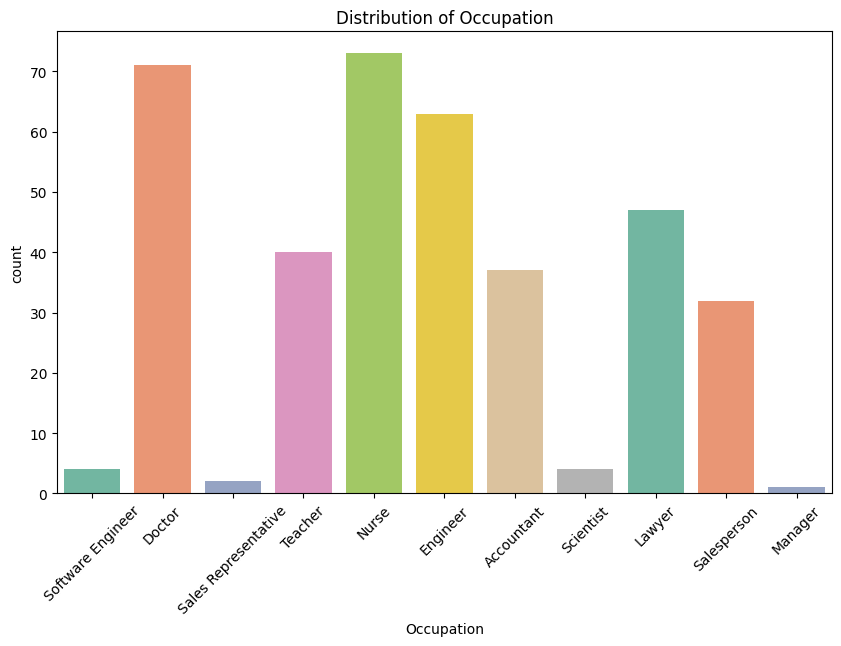

C:\Users\HP\AppData\Local\Temp\ipykernel_39468\3934255490.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=stress, palette='Set2')


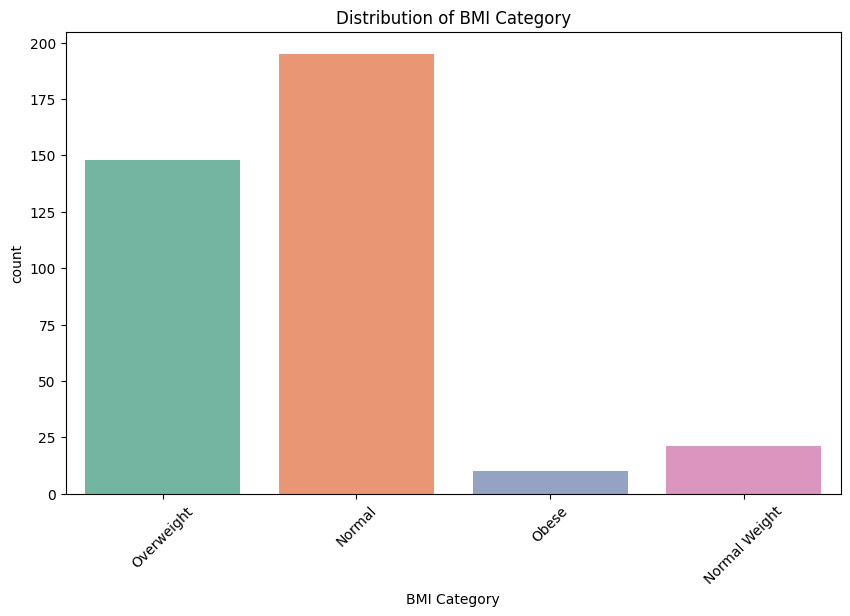

C:\Users\HP\AppData\Local\Temp\ipykernel_39468\3934255490.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=stress, palette='Set2')


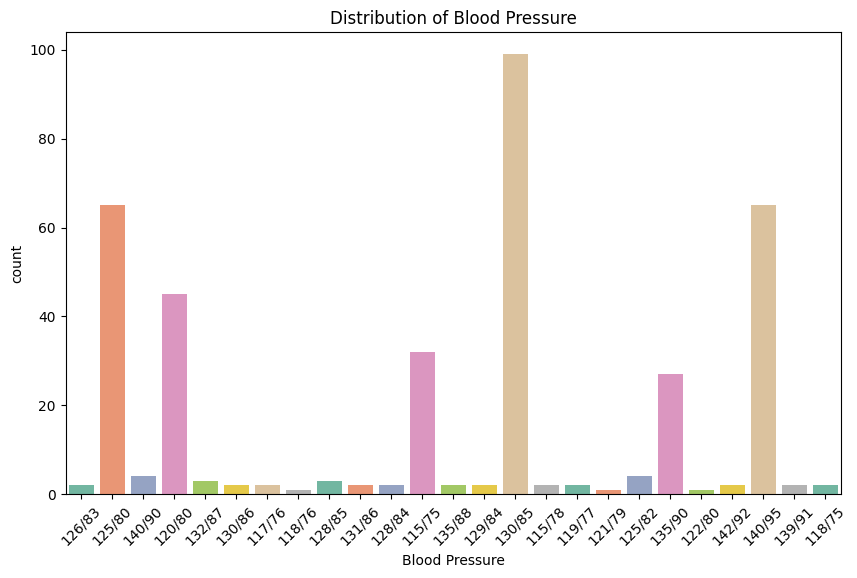

C:\Users\HP\AppData\Local\Temp\ipykernel_39468\3934255490.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=stress, palette='Set2')


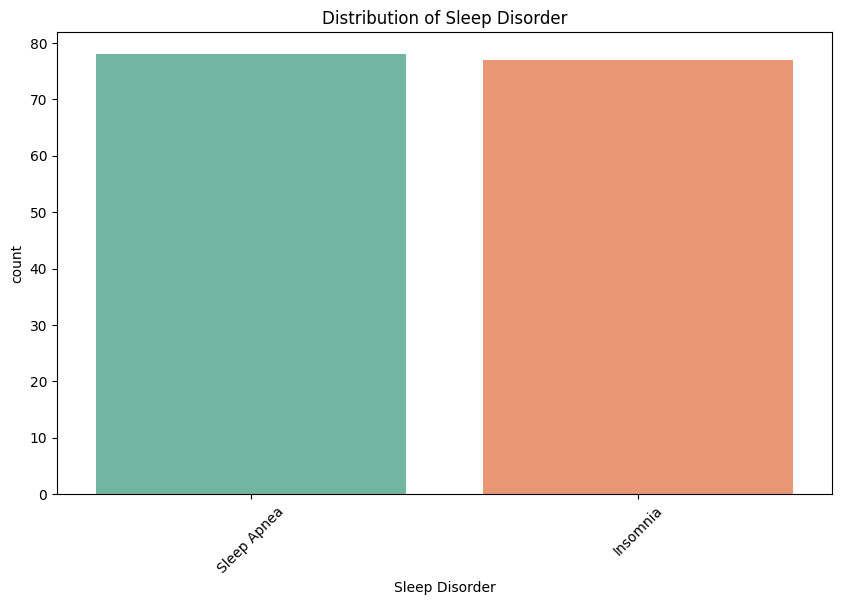

In [ ]:
# Load the Dataset
stress = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

print("Dataset Information:")
print(stress.info())
print("\nFirst 5 Rows:")
print(stress.head())

# Visualize missing values
plt.figure(figsize=(10, 6))
plt.title("Missing Values in Dataset")
missing_values = stress.isnull().sum()
missing_values[missing_values > 0].plot(kind='bar', color='skyblue')
plt.ylabel("Number of Missing Values")
plt.show()

# Visualizing distributions for all numeric columns 
numeric_columns = stress.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(stress[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualizing distributions for all categorical columns 
categorical_columns = stress.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=stress, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#  Handle the 'Blood Pressure' column
stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True)
stress[['Systolic BP', 'Diastolic BP']] = stress[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric, errors='coerce')
stress = stress.drop('Blood Pressure', axis=1)

#  Handle missing values
numeric_cols = stress.select_dtypes(include=['number']).columns
non_numeric_cols = stress.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with median
stress[numeric_cols] = stress[numeric_cols].fillna(stress[numeric_cols].median())

# Fill missing values for non-numeric columns with "Unknown"
stress[non_numeric_cols] = stress[non_numeric_cols].fillna("Unknown")


In [ ]:
# Encode categorical columns 
label_encoder = LabelEncoder()

# Encode 'BMI Category' and 'Sleep Disorder'
stress['BMI Category'] = label_encoder.fit_transform(stress['BMI Category'])
stress['Sleep Disorder'] = label_encoder.fit_transform(stress['Sleep Disorder'])

# Define features and target
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'BMI Category', 'Systolic BP', 'Diastolic BP', 'Heart Rate', 
            'Daily Steps', 'Sleep Disorder']
target = 'Stress Level'

X = stress[features]
y = stress[target]

In [ ]:
#Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), features)]
)

# model with class weight adjustment
model = RandomForestClassifier(random_state=42, class_weight='balanced')

#  pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Hyperparameter Tuning using GridSearchCV with class_weight
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Sleep '
                                                                          'Duration',
                                                                          'Quality '
                                                                          'of '
                                                                          'Sleep',
                                                                          'Physical '
                                                                          'Activity '
                                                                          'Level',
                                                                          'BMI '
                                                                          'Category',
                                                                          'Systolic '
                                                                          'BP',
                                                                          'Diastolic '
                                                                          'BP',
                                                                          'Heart '
                                                                          'Rate',
                                                                          'Daily '
                                                                          'Steps',
                                                                          'Sleep '
                                                                          'Disorder'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 150]},
             scoring='accuracy')

Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]


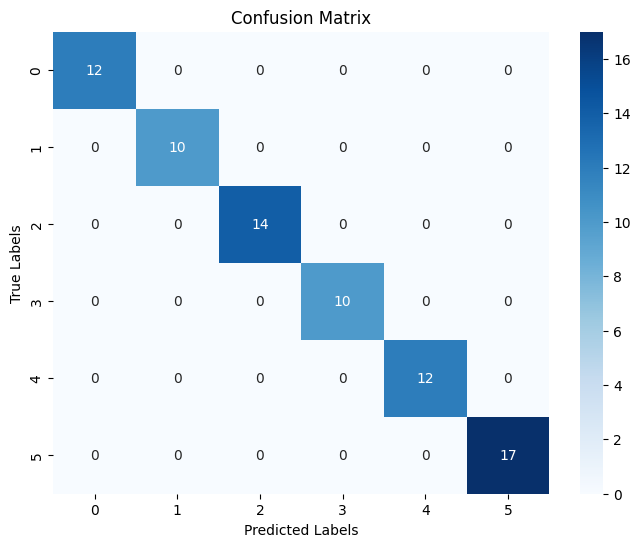

In [ ]:
# Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Interactive Stress Prediction System with Integrated Logic
def predict_stress():
    print("\n--- Stress Prediction System ---")
    print("Please answer the following questions:")

    # to Collect user input
    age = float(input("Age: ").strip())
    sleep_duration = float(input("Sleep Duration (hours): ").strip())
    quality_of_sleep = float(input("Quality of Sleep (1-5): ").strip())
    physical_activity = float(input("Physical Activity Level (1-5): ").strip())

    # Using manual mapping for BMI Category (to handle case sensitivity and extra spaces)
    bmi_categories = {'underweight': 0, 'normal': 1, 'overweight': 2}
    bmi_category = input("BMI Category (Underweight/Normal/Overweight): ").strip().lower()

    # Check for valid BMI category
    if bmi_category not in bmi_categories:
        print("Error: Invalid BMI Category. Please choose from 'Underweight', 'Normal', or 'Overweight'.")
        return
    bmi_category_encoded = bmi_categories[bmi_category]

    systolic_bp = float(input("Systolic Blood Pressure (e.g., 120): ").strip())
    diastolic_bp = float(input("Diastolic Blood Pressure (e.g., 80): ").strip())
    heart_rate = float(input("Heart Rate (e.g., 72): ").strip())
    daily_steps = float(input("Daily Steps: ").strip())
    sleep_disorder = input("Do you have a sleep disorder? (Yes/No): ").strip()

    sleep_disorder_encoded = 1 if sleep_disorder.lower() == "yes" else 0

    # dataframe for prediction
    user_data = pd.DataFrame({
        'Age': [age],
        'Sleep Duration': [sleep_duration],
        'Quality of Sleep': [quality_of_sleep],
        'Physical Activity Level': [physical_activity],
        'BMI Category': [bmi_category_encoded],
        'Systolic BP': [systolic_bp],
        'Diastolic BP': [diastolic_bp],
        'Heart Rate': [heart_rate],
        'Daily Steps': [daily_steps],
        'Sleep Disorder': [sleep_disorder_encoded]
    })

    
    stress_score = 0

    # thresholds for each feature
    if quality_of_sleep < 3:    # Poor quality sleep
        stress_score += 1
    if physical_activity < 3:   # Low physical activity
        stress_score += 1
    if systolic_bp > 130:       # High systolic BP
        stress_score += 1
    if diastolic_bp > 80:       # High diastolic BP
        stress_score += 1
    if heart_rate > 80:         # High heart rate
        stress_score += 1
    if daily_steps < 5000:      # Low daily steps
        stress_score += 1
    if sleep_disorder.lower() == "yes": 
        stress_score += 1

    # Predict the stress level using the trained model
    preprocessed_user_data = best_model.named_steps['preprocessor'].transform(user_data)
    stress_level = best_model.named_steps['model'].predict(preprocessed_user_data)[0]

    # Map stress levels to descriptions
    stress_descriptions = {
        3: "Very Low Stress",
        4: "Low Stress",
        5: "Moderate Stress",
        6: "High Stress",
        7: "Very High Stress",
        8: "Extreme Stress"
    }
    
    predicted_stress_description = stress_descriptions.get(stress_level, "Unknown Stress Level")

    # Final Decision: Combine Manual and Model-Based Predictions
    if stress_score >= 3 or stress_level >= 6:
        print("\n--- Results ---")
        print("Prediction: You are likely to have stress.")
    else:
        print("\n--- Results ---")
        print("Prediction: You are unlikely to have stress.")
    
    print(f"Predicted Stress Level: {stress_level} ({predicted_stress_description})")

predict_stress()


--- Stress Prediction System ---
Please answer the following questions:

--- Results ---
Prediction: You are likely to have stress.
Predicted Stress Level: 7 (Very High Stress)
